In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt

In [2]:
feature_df = pd.read_csv('data/systematic/features.csv')
target_df  = pd.read_csv('data/systematic/target.csv')

# Drop the specified columns from target_df
target_df_filtered = target_df.drop(columns=['sequenceID', 'max.log.lambda'])

# Concatenate feature_df and the filtered target_df
feature_target_df = pd.concat([feature_df, target_df_filtered], axis=1)

In [3]:
# Replace -inf with NaN
feature_target_df['min.log.lambda'].replace(-np.inf, np.nan, inplace=True)

# Drop rows with NaN values in column 'min.log.lambda'
feature_target_df = feature_target_df.dropna(subset=['min.log.lambda'])

In [4]:
X = feature_target_df[list(feature_target_df.columns)[1:-1]]
y = feature_target_df['min.log.lambda']

# Create a Random Forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the data
rf.fit(X, y)

RandomForestRegressor(random_state=42)

In [5]:
# Get feature importances
importances = rf.feature_importances_

# Print the feature importances
print("Feature Importances:")
for i, feature in enumerate(X.columns):
    print(f"Feature {feature}: {importances[i]}")

Feature Importances:
Feature std_deviation: 0.02873099293506622
Feature mean: 0.00389981633095752
Feature median: 0.003100416985997062
Feature variance: 0.025955146910404063
Feature range_value: 0.20779539672556294
Feature iqr: 0.014668866945369946
Feature min_value: 0.008490230463572626
Feature max_value: 0.01100096583419417
Feature abs_skewness: 0.016129598882859544
Feature kurtosis: 0.014173054721385097
Feature count: 0.025915518775139722
Feature unique_count: 0.39039258622750084
Feature sum_diff: 0.06935165993694098
Feature mean_diff: 0.011418000466168022
Feature max_diff: 0.021614899883785284
Feature min_diff: 0.0033750266248342388
Feature percentile_25: 0.004418874009629848
Feature percentile_50: 0.0029857115432886977
Feature percentile_75: 0.005413283301619647
Feature autocorr: 0.1311699524957236


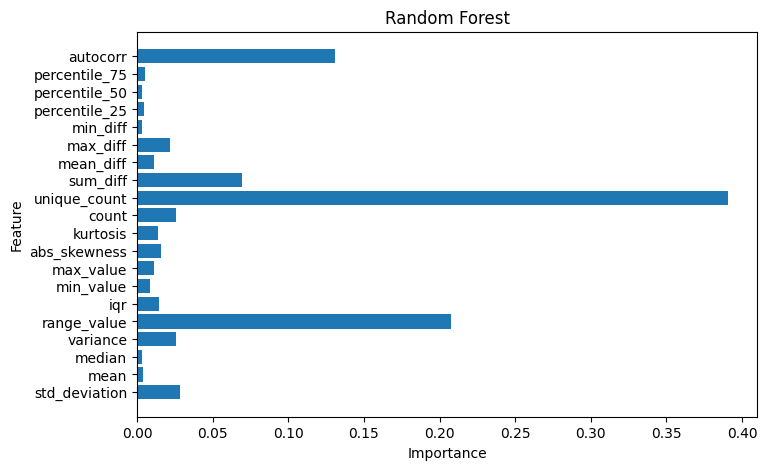

In [6]:
plt.figure(figsize=(8, 5))
plt.barh(X.columns, importances)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Random Forest")
# plt.savefig("figs/random_forest.png", format='png')
plt.show()

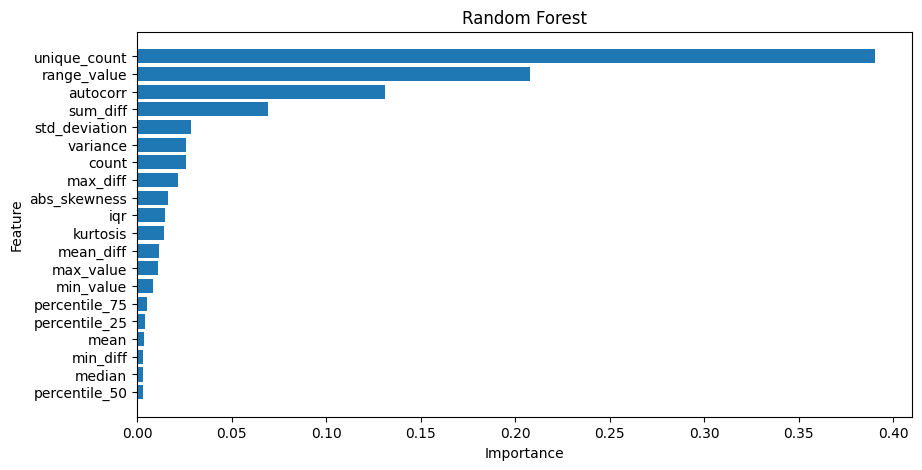

In [11]:
# Sort the importances and corresponding feature names
sorted_indices = np.argsort(importances)
sorted_importances = importances[sorted_indices]
sorted_features = X.columns[sorted_indices]

plt.figure(figsize=(10, 5))
plt.barh(sorted_features, sorted_importances)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Random Forest")
plt.savefig("figs/random_forest.png")
plt.show()